In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Chargement des données
df = pd.read_csv("data/Admission_Predict_Ver1.1.csv")

In [3]:
df.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
#Suppression de la colonne Serial No. qui est inutile pour notre projet
df = df.drop(columns=["Serial No."])

In [5]:
#on cree la colonne admitted qui a pour role de regarder si tel personne est admit ou non ici la personne doit avoir une note superieur a 0.69 pour etre admis
df['Admitted'] = (df['Chance of Admit '] >= 0.69).astype(int)

In [ ]:
#On l'utilisera pour voir quels sont les colonnes les plus corrélés
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Admitted
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351,0.667262
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228,0.622390
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132,0.543281
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137,0.534003
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365,0.520672
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413,0.695234
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871,0.455754
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000,0.806103
Admitted,0.667262,0.622390,0.543281,0.534003,0.520672,0.695234,0.455754,0.806103,1.000000


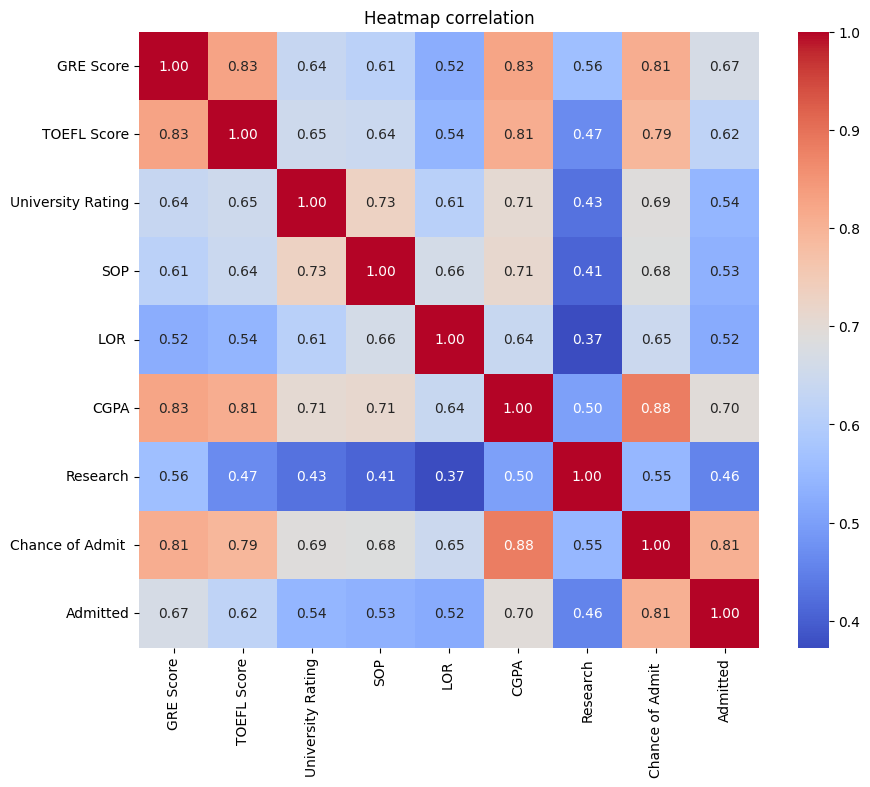

In [ ]:
#Heatmap de correlation
#Les plus correle a admitted sont
#CGPA = Cumulative Grade Point Average > Moyenne générale pondérée obtenue par l’étudiant durant ses études universitaires
#GRE Score = Graduate Record Examination Score > test standardisé souvent exigé pour entrer dans les universités anglophones, surtout aux États-Unis
#TOEFL Score Test of English as a Foreign Language >  test d’anglais pour les non-anglophones souhaitant étudier dans un pays anglophone
#On ne prend pas en compte chance of admit car on a cree Admitted a partir de ses données

plt.figure(figsize=(10 , 8))
sns.heatmap(corr_matrix , annot=True , cmap="coolwarm" , fmt='.2f')
plt.title("Heatmap correlation")
plt.show()

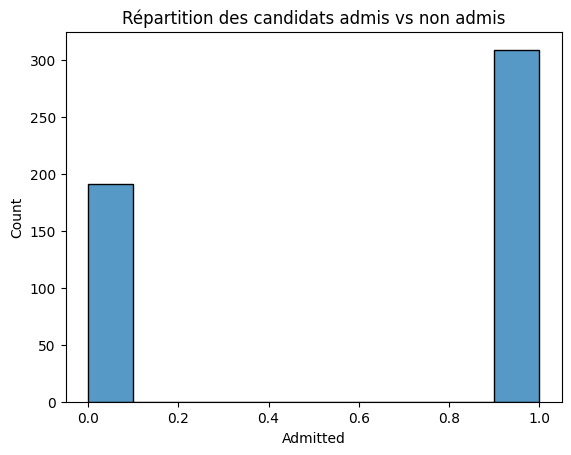

In [33]:
#Histogramme

sns.histplot(data=df , x="Admitted")
plt.title("Répartition des candidats admis vs non admis")
plt.show()

In [ ]:
#Les colonnes qu'on utilisera pour entrainer le modèle
features = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']
X = df[features]
y = df['Admitted']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline

# Séparation de l'entraînement et du test ici on utilise que 20% de notre donné
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline avec scaler et modèle
final_model = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Entraînement
final_model.fit(X_train, y_train)

# Prédiction
y_pred = final_model.predict(X_test)


In [ ]:
# ici on compare y_test à y_pred donc accuracy = y_pred/y_test
print("Accuracy :", accuracy_score(y_test, y_pred))
# Affiche un tableau croisé qui indique le nombre de fois ou chaque classe a été bien ou mal prédite.
print("Confusion Matrix :\n", confusion_matrix(y_test, y_pred))
# Affiche plusieurs metriques de classsification pour chaque classe
print("Classification Report :\n", classification_report(y_test, y_pred))


Accuracy : 0.86
Confusion Matrix :
 [[35  9]
 [ 5 51]]
Classification Report :
               precision    recall  f1-score   support

           0       0.88      0.80      0.83        44
           1       0.85      0.91      0.88        56

    accuracy                           0.86       100
   macro avg       0.86      0.85      0.86       100
weighted avg       0.86      0.86      0.86       100



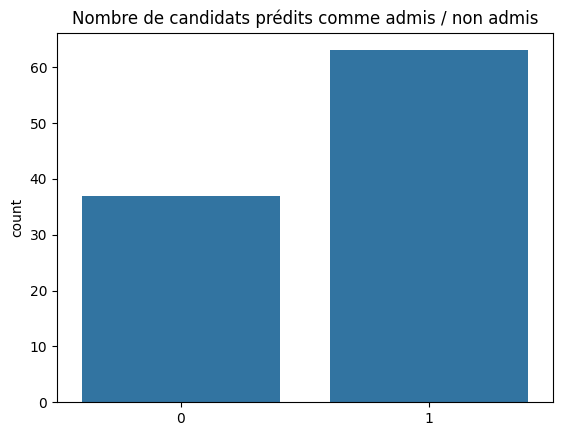

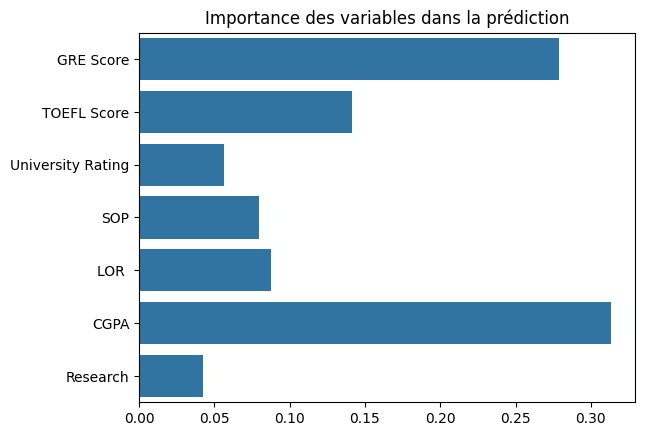

In [39]:
# Comparaison réelle vs prédite
sns.countplot(x=y_pred)
plt.title("Nombre de candidats prédits comme admis / non admis")
plt.show()

# Importance des variables
importances = model.feature_importances_
sns.barplot(x=importances, y=features)
plt.title("Importance des variables dans la prédiction")
plt.show()


In [42]:
import joblib

joblib.dump(final_model , "models/APV.pkl")


['models/APV.pkl']